# Day 1 — Exploratory Data Analysis (EDA)

## 1. Imports & Configuration

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

## 2. Load Processed Dataset

In [5]:
data_path = "../data/processed/final.csv"
df = pd.read_csv(data_path)

In [6]:
print(df.shape)
df.describe()

(302107, 9)


,isAdult,startYear,runtimeMinutes,averageRating,numVotes
count,302107.000000,302107.000000,302107.000000,302107.000000,302107.000000
mean,0.013297,1997.171108,93.528614,6.159567,3143.586001
std,0.114542,25.984113,23.196393,1.350666,22143.771032
min,0.000000,1894.000000,33.000000,1.000000,5.000000
25%,0.000000,1981.000000,80.000000,5.300000,24.000000
50%,0.000000,2008.000000,91.000000,6.300000,80.000000
75%,0.000000,2017.000000,103.000000,7.100000,398.000000
max,1.000000,2026.000000,254.000000,10.000000,550753.000000


In [7]:
df.head()

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,Miss Jerry,0,1894,45.0,Romance,5.2,231.0
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100.0,"Documentary,News,Sport",5.3,578.0
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,0,1900,40.0,"Biography,Drama",5.5,64.0
3,tt0000502,Bohemios,Bohemios,0,1905,100.0,NaN,3.1,25.0
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70.0,"Action,Adventure,Biography",6.0,1039.0


In [8]:
genres_list = set()
for genre in df["genres"].dropna():
    if len(genre.split(sep=",")) > 1:
        arr = genre.split(sep=",")
        for ele in arr:
            genres_list.add(ele)
    else:
        genres_list.add(genre)
        
print(genres_list)

{'Adult', 'Action', 'War', 'Documentary', 'Sport', 'Fantasy', 'Crime', 'Drama', 'Reality-TV', 'Sci-Fi', 'History', 'Romance', 'Horror', 'Thriller', 'Music', 'Animation', 'Biography', 'News', 'Musical', 'Family', 'Talk-Show', 'Game-Show', 'Adventure', 'Film-Noir', 'Western', 'Comedy', 'Mystery'}


## 3. Dataset Overview

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302107 entries, 0 to 302106
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          302107 non-null  object 
 1   primaryTitle    302107 non-null  object 
 2   originalTitle   302107 non-null  object 
 3   isAdult         302107 non-null  int64  
 4   startYear       302107 non-null  int64  
 5   runtimeMinutes  302107 non-null  float64
 6   genres          295826 non-null  object 
 7   averageRating   302107 non-null  float64
 8   numVotes        302107 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 20.7+ MB


## 4. Target Variable Analysis (`averageRating`)

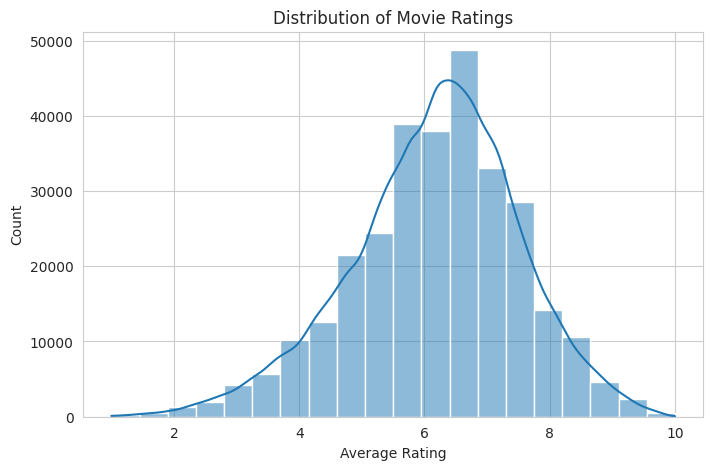

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["averageRating"], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

## 5. Numeric Feature Distributions

Numeric columns:

* runtimeMinutes
* numVotes
* startYear

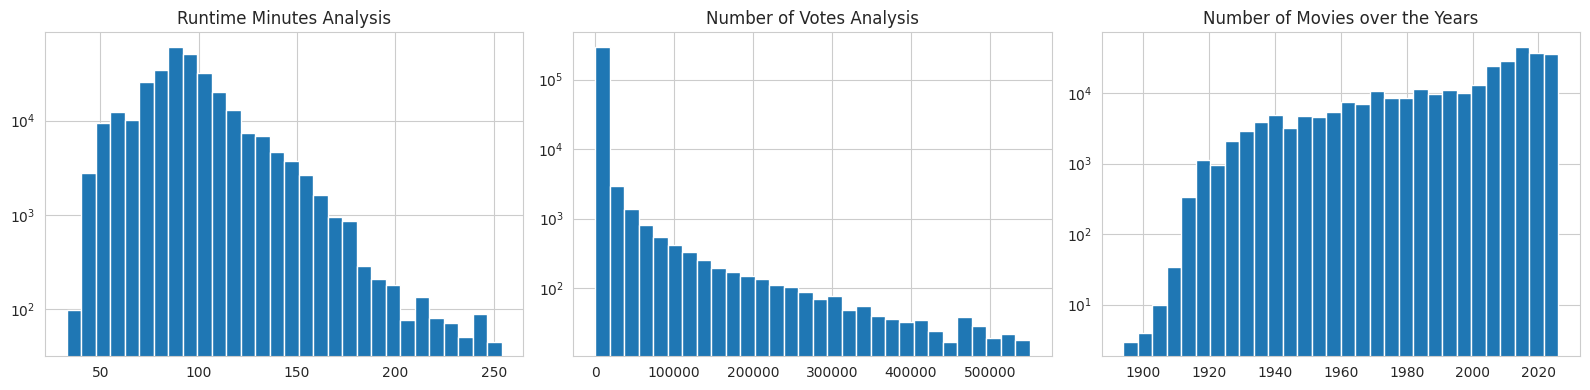

In [11]:
fig,axes = plt.subplots(1,3,figsize =(16,4))

axes[0].hist(df["runtimeMinutes"],bins=30)
axes[0].set_title("Runtime Minutes Analysis")
axes[0].set_yscale("log")

axes[1].hist(df["numVotes"],bins=30)
axes[1].set_title("Number of Votes Analysis")
axes[1].set_yscale("log")

axes[2].hist(df["startYear"],bins=30)
axes[2].set_title("Number of Movies over the Years")
axes[2].set_yscale("log")
axes[2].set_xscale("linear")

plt.tight_layout()
plt.show()

Identified the following:
* Heavy skew (especially `numVotes`)
* Potential outliers in runtime minutes

Resolutions provided:
* Scaling needs have been met by adjusting y scale to log. applied to runtime minutes and numVotes plot

## 6. Correlation Analysis (Numeric Only)

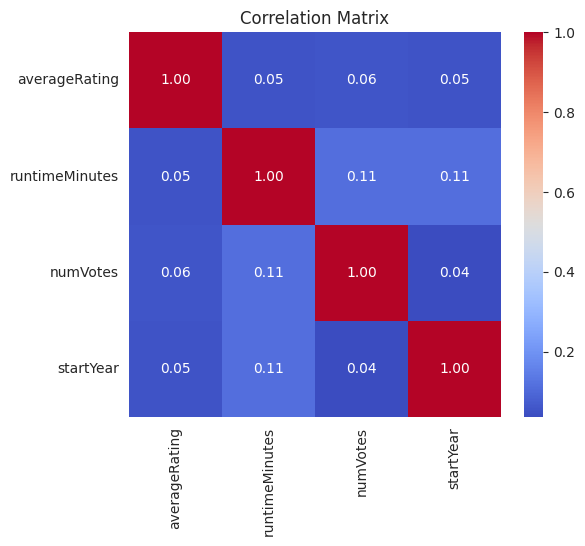

In [12]:
corr = df[["averageRating", "runtimeMinutes", "numVotes", "startYear"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 7. Missing Values Heatmap

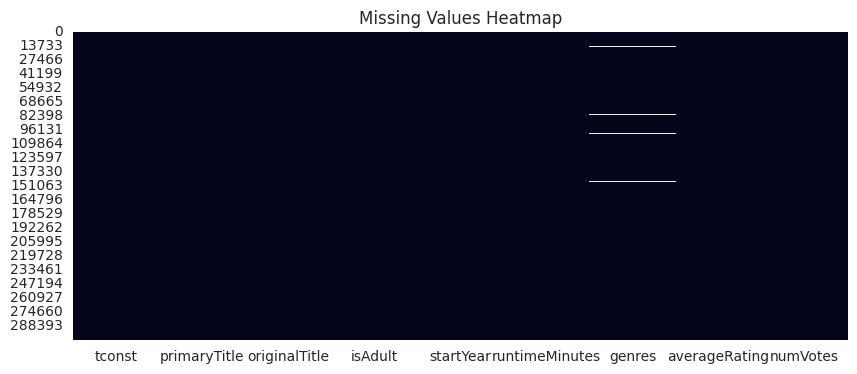

In [13]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

## 8. Categorical Feature Overview (`genres`)

In [14]:
print(df["genres"].value_counts())

genres
Drama                         50526
Documentary                   33517
Comedy                        23718
Comedy,Drama                  10080
Drama,Romance                  9370
                              ...  
Adventure,Thriller,War            1
Family,Sci-Fi,Thriller            1
Fantasy,History,War               1
Documentary,Family,Sci-Fi         1
Action,Documentary,Mystery        1
Name: count, Length: 1242, dtype: int64
